In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

data.data.shape

(569, 30)

In [2]:
logreg_l1 = LR(penalty='l1', C=0.5)

In [3]:
logreg_l2 = LR(penalty='l2', C=.5)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=420)

In [6]:
logreg_l1.fit(X_train, y_train)
logreg_l1.coef_

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 2.70837238,  0.07712475, -0.03150449, -0.01042816,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.03403119,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.00676367, -0.21118308, -0.22462037, -0.01950331,  0.        ,
         0.        , -0.0277486 ,  0.        ,  0.        ,  0.        ]])

In [7]:
logreg_l2.fit(X_train, y_train)
logreg_l2.coef_

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 1.21551976,  0.14062165,  0.14174123, -0.0095603 , -0.0456193 ,
        -0.21556013, -0.31447861, -0.14220195, -0.08234363, -0.00676176,
         0.0512696 ,  0.37077009,  0.15728653, -0.06379096, -0.00581769,
        -0.03390208, -0.06423967, -0.02128402, -0.01158553, -0.00197259,
         1.29104294, -0.2682105 , -0.21998975, -0.01921247, -0.08528594,
        -0.62188992, -0.83109331, -0.28525888, -0.17541642, -0.04614958]])

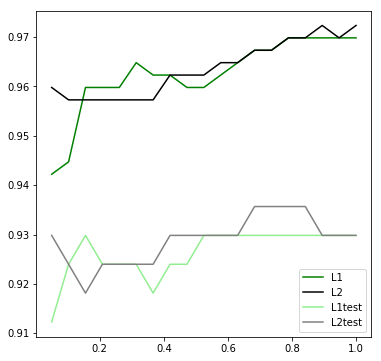

In [12]:
l1 = []
l2 = []
l1test = []
l2test = []

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(X_train,y_train)
    l1.append(accuracy_score(lrl1.predict(X_train),y_train))
    l1test.append(accuracy_score(lrl1.predict(X_test),y_test))
    
    lrl2 = lrl2.fit(X_train,y_train)
    l2.append(accuracy_score(lrl2.predict(X_train),y_train))
    l2test.append(accuracy_score(lrl2.predict(X_test),y_test))

graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


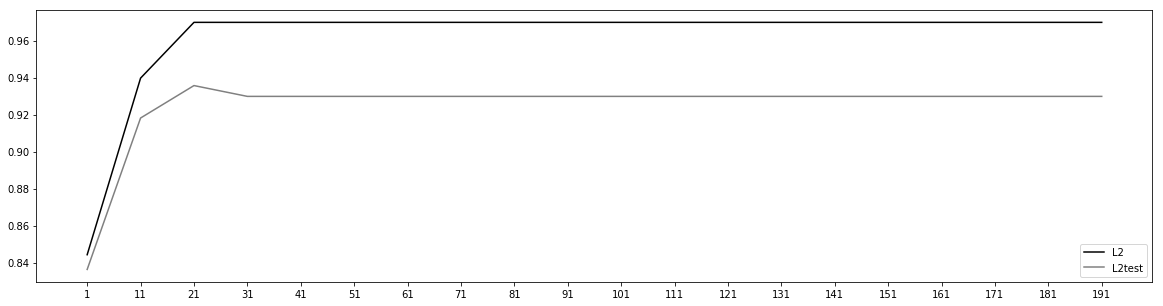

array([25], dtype=int32)

In [14]:
# 梯度下降算法
l2 = []
l2test = []
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(X_train,y_train)
    l2.append(accuracy_score(lrl2.predict(X_train),y_train))
    l2test.append(accuracy_score(lrl2.predict(X_test),y_test))
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

#我们可以使⽤用属性.n_iter_来调⽤用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(X_train,y_train)
lr.n_iter_